In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

(60000, 28, 28)

In [3]:
class_names = ['Tshirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [4]:
class_names[train_labels[6]]

'Sneaker'

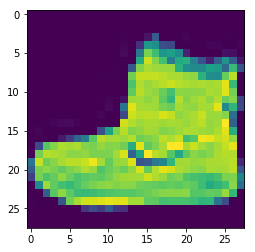

In [5]:
plt.imshow(train_images[0])

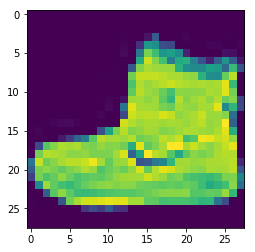

In [6]:
train_images = train_images / 255.
test_images  = test_images / 255.
plt.imshow(train_images[0])

In [7]:
x_valid,x_train = train_images[:10000],train_images[10000:]
y_valid,y_train = train_labels[:10000],train_labels[10000:]

In [8]:
np.random.seed(42)
tf.random.set_random_seed(42)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(400,activation='relu'))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax',name='Output'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 515,610
Trainable params: 515,610
Non-trainable params: 0
________________________________________________

In [18]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer='sgd',metrics=['accuracy'])

In [19]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 169us/sample - loss: 0.7337 - acc: 0.7544 - val_loss: 0.5354 - val_acc: 0.8074
Epoch 2/30
50000/50000 [==============================] - 10s 192us/sample - loss: 0.4748 - acc: 0.8326 - val_loss: 0.4594 - val_acc: 0.8407
Epoch 3/30
50000/50000 [==============================] - 10s 196us/sample - loss: 0.4220 - acc: 0.8501 - val_loss: 0.4555 - val_acc: 0.8363
Epoch 4/30
50000/50000 [==============================] - 10s 207us/sample - loss: 0.3922 - acc: 0.8593 - val_loss: 0.4069 - val_acc: 0.8544
Epoch 5/30
50000/50000 [==============================] - 10s 199us/sample - loss: 0.3686 - acc: 0.8658 - val_loss: 0.3753 - val_acc: 0.8641
Epoch 6/30
50000/50000 [==============================] - 11s 214us/sample - loss: 0.3505 - acc: 0.8736 - val_loss: 0.3652 - val_acc: 0.8705
Epoch 7/30
50000/50000 [==============================] - 10s 202us/sample - loss: 0.3360 - acc: 0.8769 -

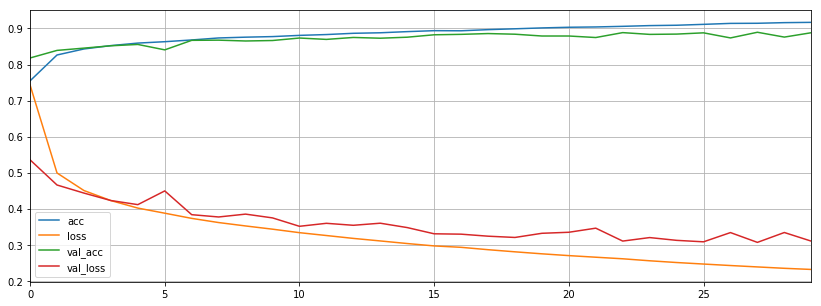

In [13]:
pd.DataFrame(model_history.history).plot(figsize=(14,5))
plt.grid(True)
plt.show()

### Model Evaluation

In [14]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.3384 - acc: 0.8801


[0.3383588900625706, 0.8801]

In [15]:
x_new = test_images[:3]
y_prob =model.predict(x_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)